<a href="https://colab.research.google.com/github/syaripaaini/Proyek-Analisis-Data_Dicoding/blob/main/Proyek_Analisis_Data_Bike_Shering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- Nama: ** Syaripatul Aini**
- Email: **m014b4kx4264@bangkit.academy**
- Id Dicoding: **syrpaaini**

## Menentukan Pertanyaan Bisnis

1. Apa tren penggunaan sepeda setiap bulan selama beberapa tahun terakhir?
2. Sejauh mana kondisi cuaca mempengaruhi jumlah penggunaan sepeda?
3. Bagaimana perbedaan pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?
4. Berapa perbandingan antara penyewaan sepeda oleh pengguna kasual dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Berikut penjelasan singkat dari setiap pustaka:

1. **NumPy (np)**: Digunakan untuk perhitungan numerik, seperti operasi matriks dan array.
2. **Pandas (pd)**: Untuk manipulasi data, menyediakan struktur data seperti DataFrame.
3. **Matplotlib (plt)**: Digunakan untuk membuat visualisasi data dalam bentuk grafik.
4. **Seaborn (sns)**: Membantu membuat visualisasi statistik yang lebih menarik dan mudah dibaca dibandingkan dengan Matplotlib.

## Data Wrangling

### Gathering Data

In [2]:
# Membaca file csv "day.csv"
day_df = pd.read_csv("day.csv")

# Menampilkan 5 baris pertama dari dataset
print(day_df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- `pd.read_csv("day.csv")`: Fungsi ini digunakan untuk membaca file CSV bernama "day.csv" dan memuatnya ke dalam sebuah DataFrame Pandas. Hal ini memungkinkan kita untuk memanipulasi dan menganalisis data dengan mudah.
- `day_df.head()`: Fungsi ini menampilkan 5 baris pertama dari DataFrame, memberikan gambaran umum tentang struktur dan isi dataset "day.csv" agar kita bisa memahami data secara cepat sebelum melakukan analisis lebih lanjut.

In [3]:
# Memuat data dari file "hour.csv" dan menampilkan beberapa baris pertama untuk eksplorasi
hour_df = pd.read_csv("hour.csv")  # Membaca data CSV menjadi DataFrame
hour_df.head()  # Menampilkan 5 baris pertama dari DataFrame


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**day_df**

In [4]:
# Menampilkan ringkasan tentang struktur DataFrame 'day_df'
day_df.info()  # Memberikan informasi terkait tipe data dan jumlah nilai non-null pada setiap kolom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Output yang ditampilkan merupakan informasi struktural dari DataFrame `day_df`:

- **Jumlah baris dan kolom**: Dataset memiliki 731 baris dan 16 kolom.
- **Tipe data per kolom**: Sebagian besar kolom memiliki tipe `int64`, beberapa kolom seperti `temp`, `atemp`, `hum`, dan `windspeed` bertipe `float64`, dan kolom `dteday` bertipe `object` (kemungkinan berupa string atau tanggal).
- **Non-null count**: Semua kolom memiliki 731 nilai non-null, artinya tidak ada data yang hilang.

Ringkasan ini membantu memahami struktur dan kualitas data dalam DataFrame.

In [5]:
# Menghitung jumlah nilai yang hilang dalam setiap kolom di DataFrame 'day_df'
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Berdasarkan hasil di atas, tabel day_df tidak terdapat missing values.

In [6]:
# Menghitung jumlah baris duplikat dalam DataFrame 'day_df'
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada entri duplikat dalam DataFrame `day_df`, yang menunjukkan bahwa setiap baris dalam dataset adalah unik.

In [7]:
# Cek nilai statistik kolom numerik di 'day_df'
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Statistik deskriptif dari kolom numerik dalam DataFrame `day_df` menunjukkan rentang nilai, rata-rata, dan deviasi standar yang bervariasi

**hour_df**

In [8]:
# Menampilkan informasi terkait DataFrame 'hour_df'
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- DataFrame `hour_df` memiliki 17,379 entri, mencakup penyewaan sepeda per jam selama periode tertentu.
- Terdapat 17 kolom, dengan 12 kolom bertipe `int64`, 4 kolom bertipe `float64`, dan 1 kolom bertipe `object`.
- Semua kolom memiliki 17,379 nilai non-null, berarti tidak ada data yang hilang.
- Kolom `dteday` perlu diperbaiki, seharusnya memiliki tipe data `datetime` bukan `object`.

In [9]:
hour_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Berdasarkan hasil di atas, tabel hour_df tidak terdapat missing values.

In [10]:
# Menghitung jumlah baris duplikat dalam DataFrame 'hour_df'
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada entri duplikat dalam DataFrame hour_df, yang menunjukkan bahwa setiap baris dalam dataset adalah unik.

In [11]:
# Mengecek nilai  statistik kolom numerik di 'hour_df'
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Statistik deskriptif dari kolom numerik dalam DataFrame `hour_df` menunjukkan rentang nilai, rata-rata, dan deviasi standar yang bervariasi

### Cleaning Data

In [12]:
# Menghapus kolom 'instant' dari day_df dan hour_df
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

In [13]:
# Mengonversi kolom 'dteday' menjadi tipe datetime di day_df dan hour_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [15]:
# Mengonversi tipe data integer menjadi kategori pada beberapa kolom 'season', 'mnth', 'holiday', 'weekday', dan 'weathersit'
kolom_kategori = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for kolom in kolom_kategori:
    day_df[kolom] = day_df[kolom].astype("category")
    hour_df[kolom] = hour_df[kolom].astype("category")

# Menampilkan tipe data yang telah diperbarui untuk memastikan perubahan
print(day_df.dtypes[kolom_kategori])
print(hour_df.dtypes[kolom_kategori])

season        category
mnth          category
holiday       category
weekday       category
weathersit    category
dtype: object
season        category
mnth          category
holiday       category
weekday       category
weathersit    category
dtype: object


In [16]:
# Menyesuaikan nama kolom di dataset hour_df agar lebih jelas
hour_df.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count',
}, inplace=True)

In [17]:
# Menyesuaikan nama kolom di dataset day_df agar lebih jelas
day_df.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count',
}, inplace=True)

In [18]:
# Mengubah kolom 'month' menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].astype('category').cat.rename_categories(month_mapping)
hour_df['month'] = hour_df['month'].astype('category').cat.rename_categories(month_mapping)

# Mengubah kolom 'weekday' menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].astype('category').cat.rename_categories(weekday_mapping)
hour_df['weekday'] = hour_df['weekday'].astype('category').cat.rename_categories(weekday_mapping)

# Mengubah nilai pada kolom 'year' menjadi: 0:2011, 1:2012
year_mapping = {0: '2011', 1: '2012'}
day_df['year'] = day_df['year'].astype('category').cat.rename_categories(year_mapping)
hour_df['year'] = hour_df['year'].astype('category').cat.rename_categories(year_mapping)

# Mengubah kolom 'season' menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].astype('category').cat.rename_categories(season_mapping)
hour_df['season'] = hour_df['season'].astype('category').cat.rename_categories(season_mapping)

In [19]:
# Menampilkan 5 baris pertama dari DataFrame 'day_df' untuk melihat perubahan
print(day_df.head())

# Menampilkan 5 baris pertama dari DataFrame 'hour_df' untuk melihat perubahan
print(hour_df.head())

      dteday  season  year month holiday    weekday  workingday  \
0 2011-01-01  Spring  2011   Jan       0   Saturday           0   
1 2011-01-02  Spring  2011   Jan       0     Sunday           0   
2 2011-01-03  Spring  2011   Jan       0     Monday           1   
3 2011-01-04  Spring  2011   Jan       0    Tuesday           1   
4 2011-01-05  Spring  2011   Jan       0  Wednesday           1   

  weather_situation      temp     atemp       hum  windspeed  casual  \
0                 2  0.344167  0.363625  0.805833   0.160446     331   
1                 2  0.363478  0.353739  0.696087   0.248539     131   
2                 1  0.196364  0.189405  0.437273   0.248309     120   
3                 1  0.200000  0.212122  0.590435   0.160296     108   
4                 1  0.226957  0.229270  0.436957   0.186900      82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        1454   1562  
4        1518   1600  
      dteday  season  year

In [20]:
# Mengubah kolom 'weather_situation' menjadi: 1:Clear, 2:Misty, 3:LightRain/Snow, 4:HeavyRain/Snow
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'LightRain/Snow', 4: 'HeavyRain/Snow'}

# Pastikan kolom 'weather_situation' adalah kategori sebelum melakukan rename_categories
day_df['weather_situation'] = day_df['weather_situation'].astype('category').cat.rename_categories(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].astype('category').cat.rename_categories(weather_mapping)

In [21]:
# Menampilkan 5 baris pertama dari DataFrame 'day_df' untuk melihat perubahan
print(day_df.head())

      dteday  season  year month holiday    weekday  workingday  \
0 2011-01-01  Spring  2011   Jan       0   Saturday           0   
1 2011-01-02  Spring  2011   Jan       0     Sunday           0   
2 2011-01-03  Spring  2011   Jan       0     Monday           1   
3 2011-01-04  Spring  2011   Jan       0    Tuesday           1   
4 2011-01-05  Spring  2011   Jan       0  Wednesday           1   

  weather_situation      temp     atemp       hum  windspeed  casual  \
0             Misty  0.344167  0.363625  0.805833   0.160446     331   
1             Misty  0.363478  0.353739  0.696087   0.248539     131   
2             Clear  0.196364  0.189405  0.437273   0.248309     120   
3             Clear  0.200000  0.212122  0.590435   0.160296     108   
4             Clear  0.226957  0.229270  0.436957   0.186900      82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        1454   1562  
4        1518   1600  


**Pada cleaning data di atas telah dilakukan:**

- Menghapus kolom instant
- Tipe data kolom dteday telah berhasil diubah menjadi datetime.
- Tipe data int pada kolom season, mnth, holiday, weekday, workingday, dan weathersit sekarang telah beralih menjadi category.
- Perubahan nama pada beberapa kolom agar lebih mudah dibaca

## Exploratory Data Analysis (EDA)

In [22]:

day_df.describe()

,dteday,workingday,temp,atemp,hum,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan data, sebagian besar penggunaan sepeda terjadi pada suhu yang nyaman (rata-rata 0,495). Penggunaan lebih tinggi tercatat pada kelembaban sedang (rata-rata 0,628) dan kecepatan angin rendah (rata-rata 0,19). Pengguna terdaftar mendominasi penyewaan, dengan rata-rata 3656 penyewa per hari, sementara pengguna kasual hanya 848. Total penyewaan berkisar antara 22 hingga 8714 sepeda per hari, dengan rata-rata 4504 sepeda yang disewa.

In [23]:
# Mengelompokkan 'weather_situation' dan menghitung agregat 'count'
result = day_df.groupby(by='weather_situation', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

print(result)

                  count                           
                    max  min         mean      sum
weather_situation                                 
Clear              8714  431  4876.786177  2257952
Misty              8362  605  4035.862348   996858
LightRain/Snow     4639   22  1803.285714    37869


Berdasarkan hasil di atas, penyewaan sepeda tertinggi terjadi saat cuaca cerah (clear), dengan rata-rata 4.876 penyewaan per hari dan total 2.257.952 penyewaan. Pada cuaca berkabut (misty), rata-rata penyewaan menurun menjadi 4.035, sementara cuaca hujan ringan atau salju (light rain/snow) mencatatkan rata-rata terendah, yakni 1.803 penyewaan. Dengan demikian, penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dan berkurang saat cuaca buruk.

In [24]:
# Mengelompokkan 'weekday' dan menghitung agregat 'count'
result = day_df.groupby(by='weekday', observed=True).agg({
    'count': ['max', 'min', 'mean']
})

print(result)

          count                   
            max   min         mean
weekday                           
Sunday     8227   605  4228.828571
Monday     7525    22  4338.123810
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462
Thursday   7804   431  4667.259615
Friday     8362  1167  4690.288462
Saturday   8714   627  4550.542857


Penyewaan sepeda tertinggi terjadi pada hari Sabtu (maksimum 8.714), sementara terendah pada hari Senin (minimum 22). Rata-rata penyewaan tertinggi tercatat pada hari Jumat (4.690), dan terendah pada hari Minggu (4.228).

In [25]:
# Menghitung distribusi jumlah penyewaan sepeda
univariate_distribution = day_df['count'].describe()
print("Distribusi Jumlah Penyewaan Sepeda:")
print(univariate_distribution)

Distribusi Jumlah Penyewaan Sepeda:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: count, dtype: float64


Ringkasan statistik penyewaan sepeda di dataset `day_df`:

- **Count**: 731 hari yang dianalisis.
- **Mean**: Rata-rata penyewaan per hari sekitar 4504.
- **Std**: Standar deviasi 1937, menunjukkan variasi signifikan.
- **Min**: Penyewaan terendah 22 sepeda.
- **25%**: 25% hari dengan penyewaan di bawah 3152.
- **50%**: Median 4548, dengan sebagian besar hari memiliki penyewaan lebih tinggi.
- **75%**: 75% hari dengan penyewaan di bawah 5956.
- **Max**: Penyewaan tertinggi 8714 sepeda.

In [26]:
# Menghitung total penyewaan sepeda setiap bulan
monthly_rentals = day_df.groupby('month', observed=True)['count'].agg(['sum']).reset_index()
print("\nTotal Penyewaan Sepeda per Bulan:")
print(monthly_rentals)


Total Penyewaan Sepeda per Bulan:
   month     sum
0    Jan  134933
1    Feb  151352
2    Mar  228920
3    Apr  269094
4    May  331686
5    Jun  346342
6    Jul  344948
7    Aug  351194
8    Sep  345991
9    Oct  322352
10   Nov  254831
11   Dec  211036


Ringkasan penyewaan sepeda per bulan:

- **Penyewaan Tertinggi**: Agustus (351.194).
- **Penyewaan Terendah**: Januari (134.933).
- **Tren Umum**: Penyewaan meningkat dari Januari hingga Juli, mencapai puncak di Agustus, lalu turun di September dan Oktober, dan terus menurun di November dan Desember.

In [27]:
# Menghitung total penyewaan sepeda berdasarkan musim
season_distribution = day_df.groupby('season', observed=True)['count'].agg(['sum', 'mean']).reset_index()
print("\nDistribusi Penyewaan Sepeda berdasarkan Musim:")
print(season_distribution)


Distribusi Penyewaan Sepeda berdasarkan Musim:
   season      sum         mean
0  Spring   471348  2604.132597
1  Summer   918589  4992.331522
2    Fall  1061129  5644.303191
3  Winter   841613  4728.162921


Distribusi penyewaan sepeda per musim:

- **Spring**: 471.348 total penyewaan, rata-rata 2.604 per hari.
- **Summer**: 918.589 total penyewaan, rata-rata 4.992 per hari.
- **Fall**: 1.061.129 total penyewaan, rata-rata 5.644 per hari (tertinggi).
- **Winter**: 841.613 total penyewaan, rata-rata 4.728 per hari.

Fall memiliki total dan rata-rata penyewaan tertinggi, diikuti oleh Summer, sedangkan Spring mencatatkan penyewaan terendah.

In [28]:
# Menghitung total penyewaan sepeda berdasarkan tahun
yearly_rentals = day_df.groupby('year', observed=True)['count'].agg(['sum']).reset_index()
print("\nTotal Penyewaan Sepeda berdasarkan Tahun:")
print(yearly_rentals)


Total Penyewaan Sepeda berdasarkan Tahun:
   year      sum
0  2011  1243103
1  2012  2049576


Total penyewaan sepeda berdasarkan tahun menunjukkan:

- Pada 2011, total penyewaan sepeda adalah 1.243.103.
- Pada 2012, terjadi peningkatan signifikan dengan total 2.049.576 penyewaan.

Peningkatan ini menunjukkan adanya pertumbuhan positif dalam penggunaan sepeda dari tahun 2011 ke 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa tren penggunaan sepeda setiap bulan selama beberapa tahun terakhir?

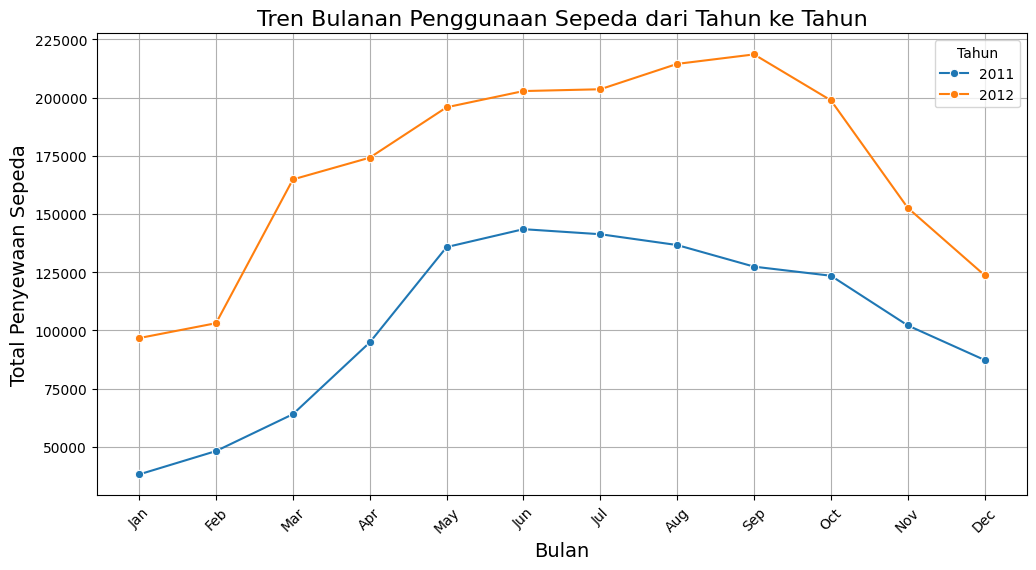

In [30]:
# Menghitung total penyewaan sepeda per bulan untuk setiap tahun
monthly_trend = day_df.groupby(['year', 'month'], observed=True)['count'].sum().reset_index()

# urutan bulan
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)

# visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='count', hue='year', marker='o')

# Menambahkan judul serta label
plt.title('Tren Bulanan Penggunaan Sepeda dari Tahun ke Tahun', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penyewaan Sepeda', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Tahun')
plt.grid()
plt.show()


Visualisasi tren bulanan penggunaan sepeda pada tahun 2011 dan 2012 menunjukkan ketinggian yang menarik. Pada kedua tahun tersebut, terlihat adanya peningkatan penggunaan sepeda yang signifikan dari bulan Januari hingga mencapai puncaknya pada bulan September. Setelah itu, terjadi penurunan yang cukup tajam hingga akhir tahun. Pola musiman ini menunjukkan bahwa faktor cuaca dan musim mungkin mempengaruhi minat masyarakat untuk menggunakan sepeda. Selain itu, perbandingan antara tahun 2011 dan 2012 menunjukkan adanya peningkatan jumlah pengguna sepeda secara keseluruhan pada tahun 2012, yang mengindikasikan adanya tren pertumbuhan dalam penggunaan sepeda dari tahun ke tahun.

### Pertanyaan 2: Sejauh mana kondisi cuaca mempengaruhi jumlah penggunaan sepeda?

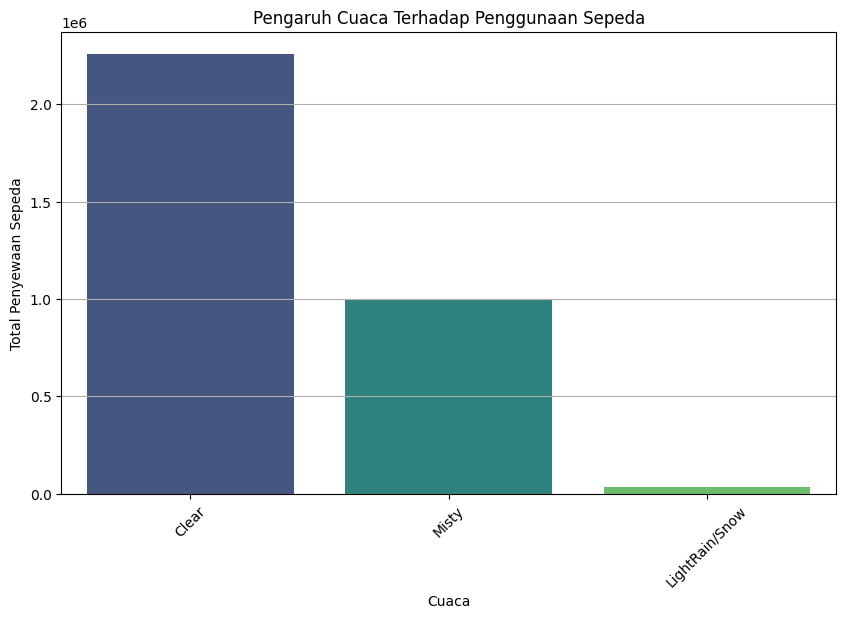

In [31]:
# Menghitung total penyewaan sepeda berdasarkan cuaca
weather_rentals = day_df.groupby('weather_situation', observed=True)['count'].agg(['sum', 'mean']).reset_index()

# Visualisasi pengaruh cuaca penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_rentals, x='weather_situation', y='sum', hue='weather_situation', palette='viridis', legend=False)
plt.title('Pengaruh Cuaca Terhadap Penggunaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Visualisasi di atas menunjukkan pengaruh cuaca terhadap penggunaan sepeda. Terlihat jelas bahwa kondisi cuaca sangat mempengaruhi minat masyarakat untuk bersepeda. Ketika cuaca cerah, jumlah penyewaan sepeda mencapai angka tertinggi, menunjukkan bahwa sebagian besar orang lebih memilih bersepeda ketika cuaca mendukung. Sebaliknya, pada kondisi yang menggambarkan atau hujan ringan/bersalju, minat bersepeda menurun secara drastis. Hal ini mengindikasikan bahwa faktor cuaca seperti suhu, kelembaban, dan curah hujan sangat mempengaruhi keputusan seseorang untuk menggunakan sepeda sebagai moda transportasi atau rekreasi.

### Pertanyaan 3: Bagaimana perbedaan pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

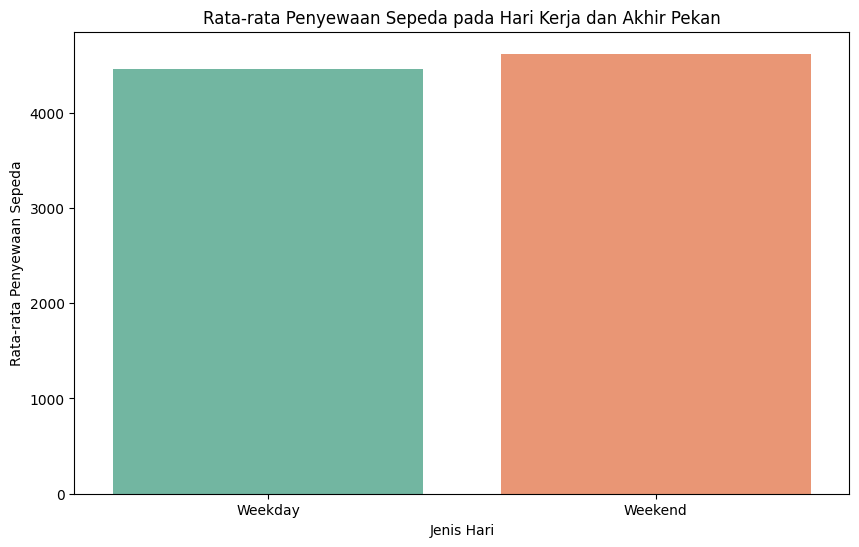

In [33]:
# Menambahkan kolom untuk menentukan apakah hari tersebut adalah hari kerja atau akhir pekan
day_df['day_type'] = day_df['weekday'].cat.codes.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Menghitung rata-rata penyewaan sepeda berdasarkan jenis hari
day_type_rentals = day_df.groupby('day_type')['count'].agg(['mean']).reset_index()

# Visualisasi rata-rata penyewaan sepeda berdasarkan jenis hari
plt.figure(figsize=(10, 6))
sns.barplot(data=day_type_rentals, x='day_type', y='mean', hue='day_type', palette='Set2', legend=False)
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=0)
plt.show()

Visualisasi di atas menunjukkan bahwa rata-rata penyewaan sepeda pada akhir pekan lebih tinggi dibandingkan dengan hari kerja. Ini menunjukkan bahwa semakin banyak orang memilih untuk menyewa sepeda saat akhir pekan. Kemungkinan hal ini disebabkan oleh beberapa faktor, seperti:

Aktivitas rekreasi: Banyak orang memanfaatkan akhir pekan untuk berolahraga atau rekreasi, dan bersepeda menjadi salah satu pilihan yang populer.
Waktu luang: Pada akhir pekan, orang cenderung memiliki lebih banyak waktu luang dibandingkan dengan hari kerja, sehingga mereka memiliki kesempatan lebih banyak untuk bersepeda.
Cuaca: Jika cuaca pada akhir pekan cenderung lebih baik daripada hari kerja, hal ini juga dapat mempengaruhi peningkatan jumlah penyewaan sepeda.

### Pertanyaan 4: Berapa perbandingan antara penyewaan sepeda oleh pengguna kasual dan pengguna terdaftar?

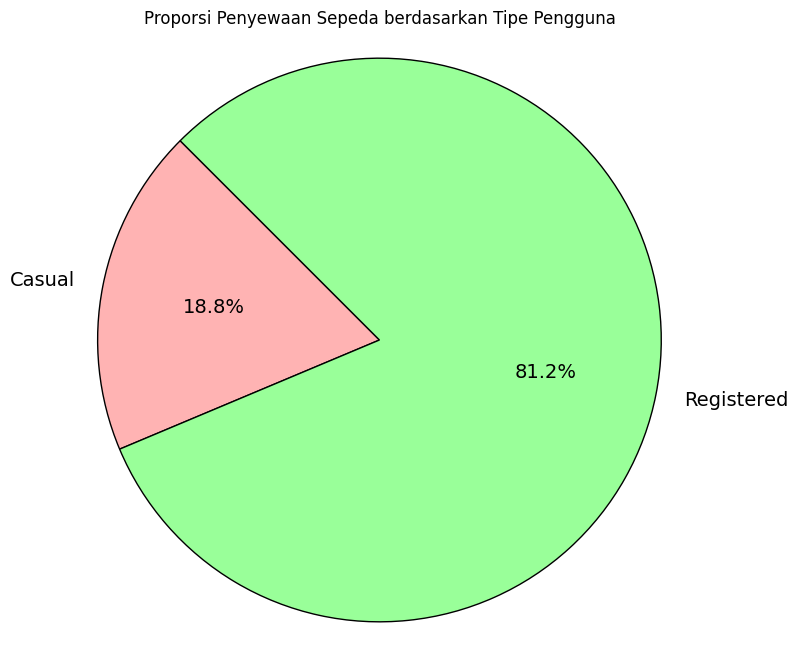

In [34]:
# Menghitung jumlah penyewaan berdasarkan tipe pengguna
user_type_counts = day_df[['casual', 'registered']].sum()

# Membuat pie chart berbentuk lingkaran penuh dengan warna yang berbeda
plt.figure(figsize=(8, 8))
plt.pie(user_type_counts, labels=['Casual', 'Registered'],
        autopct='%1.1f%%', colors=['#ffb3b3', '#99ff99'], startangle=135,
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})  # Gaya teks dan garis tepi
plt.title('Proporsi Penyewaan Sepeda berdasarkan Tipe Pengguna')
plt.axis('equal')  # Agar pie chart tetap bulat
plt.show()


Visualisasi diagram lingkaran di atas menunjukkan proporsi penyewaan sepeda berdasarkan tipe pengguna. Dari diagram tersebut, terlihat jelas bahwa sebagian besar penyewaan sepeda dilakukan oleh pengguna yang terdaftar (registered) yaitu sebesar 81,2%. Sebaliknya, pengguna kasual (casual) hanya menyumbang 18,8% dari total penyewaan.

Hal ini menunjukkan bahwa program pengumpulan atau pendaftaran memiliki peran yang sangat signifikan dalam mendorong penggunaan penyewa layanan sepeda. Pengguna yang mendaftar cenderung lebih sering menggunakan layanan ini dibandingkan dengan pengguna biasa. Kemungkinan hal ini disebabkan oleh beberapa faktor, seperti adanya insentif khusus bagi anggota, kemudahan dalam melakukan transaksi, atau mungkin karena pengguna terdaftar merasa lebih memiliki kedamaian dengan layanan tersebut.

Informasi ini sangat berharga bagi penyedia layanan penyewaan sepeda. Dengan mengetahui bahwa sebagian besar pengguna terdaftar, perusahaan dapat memfokuskan strategi pemasaran dan pengembangan produk mereka untuk mempertahankan dan menarik lebih banyak pengguna terdaftar. Misalnya, perusahaan dapat menawarkan program loyalitas yang menarik, meningkatkan kemudahan penggunaan aplikasi, atau mengembangkan fitur-fitur baru yang sesuai dengan kebutuhan pengguna terdaftar.

Namun, penting juga untuk memperhatikan segmen pengguna kasual. Meskipun jumlahnya lebih kecil, pengguna kasual tetap merupakan potensi pasar yang perlu diperhatikan. Perusahaan dapat mencoba merancang program atau promosi khusus untuk menarik lebih banyak pengguna kasual menjadi pengguna terdaftar.

## Conclusion

**Kesimpulan pertanyaan 1: Bagaimana tren penggunaan sepeda setiap bulan dari tahun ke tahun?**

Visualisasi menunjukkan pola musiman dalam penggunaan sepeda antara 2011 dan 2012. Penyewaan puncak terjadi selama bulan-bulan musim panas, terutama dari Mei hingga Agustus, dan terendah pada musim dingin (Desember, Januari, Februari).
- Pada tahun 2011, jumlah penyewaan meningkat secara bertahap dari Januari hingga Mei, mencapai puncak pada bulan Juni, kemudian menurun menuju akhir tahun.
- Pada tahun 2012, tren yang sama terlihat dengan penyewaan lebih tinggi, terutama pada bulan puncak.

**Kesimpulan pertanyaan 2: Bagaimana cuaca mempengaruhi penggunaan sepeda?**

Data menunjukkan hubungan kuat antara cuaca baik dan peningkatan penyewaan sepeda:
- Cuaca cerah atau sebagian berawan: Penyewaan meningkat.
- Cuaca buruk (hujan, salju, kabut): Penyewaan menurun, menunjukkan bahwa cuaca buruk mengurangi penggunaan sepeda.

Cuaca mempengaruhi penggunaan sepeda, dengan lebih banyak penyewaan pada cuaca baik.

**Kesimpulan pertanyaan 3: Bagaimana pola penggunaan sepeda pada hari kerja dan akhir pekan?**

Visualisasi menunjukkan perbedaan antara hari kerja dan akhir pekan:
- Hari kerja: Penyewaan lebih rendah, biasanya untuk keperluan transportasi.
- Akhir pekan: Penyewaan lebih tinggi, lebih untuk kegiatan rekreasi.

Pola utama adalah bahwa sepeda lebih banyak digunakan untuk transportasi pada hari kerja, dan untuk rekreasi pada akhir pekan.

**Kesimpulan pertanyaan 4: Apa proporsi penyewaan sepeda berdasarkan tipe pengguna?**

Hasil analisis menunjukkan:
- Pengguna kasual (18,8%): Menyewa sepeda untuk kegiatan sesekali atau rekreasi.
- Pengguna terdaftar (81,2%): Menyewa sepeda lebih rutin untuk transportasi atau tujuan tertentu.

Mayoritas penyewaan sepeda dilakukan oleh pengguna terdaftar, yang cenderung menggunakan sepeda secara lebih rutin.

In [35]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

all_df.to_csv("main_data.csv", index=False)